In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 한글폰트 깨짐 방지

from matplotlib import font_manager, rc

font_path = '../visualization/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

# 마이너스 부호 깨짐 방지
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


In [4]:
data = pd.read_csv('../../data_add/서울시 코로나19 확진자 현황.csv')
data

C:\Users\SBAUser\AppData\Local\Temp\ipykernel_15436\321534109.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../../data_add/서울시 코로나19 확진자 현황.csv')


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99545,5,2020-01-31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99546,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99547,3,2020-01-30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99548,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


In [5]:
data.columns

Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')

데이터 확인 및 전처리

컬럼별 데이터 확인


In [6]:
data['이동경로'].unique()

array([nan, '이동경로 공개기간 경과'], dtype=object)

불필요한 컬럼 삭제

In [7]:
data.drop(columns = ['환자번호', '국적', '환자정보','조치사항', '이동경로', '등록일', '수정일', '노출여부'], inplace = True)
data

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
99546,4,2020-01-30,마포구,중국,해외유입,퇴원
99547,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
99548,2,2020-01-30,중랑구,중국,해외유입,퇴원


자료형 변환

In [8]:
data.dtypes

연번      int64
확진일    object
지역     object
여행력    object
접촉력    object
상태     object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      99550 non-null  int64 
 1   확진일     99550 non-null  object
 2   지역      99550 non-null  object
 3   여행력     1717 non-null   object
 4   접촉력     99550 non-null  object
 5   상태      99550 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [10]:
# 확진일 객체 >> 날짜로 변경??
# 여행력이 nan이 많음 >> 결측치 처리해야 함


In [11]:
# 확진일 >> datetime

data['확진일'] = pd.to_datetime(data['확진일'])

In [12]:
data.dtypes

연번              int64
확진일    datetime64[ns]
지역             object
여행력            object
접촉력            object
상태             object
dtype: object

In [13]:
data['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [14]:
data['지역'].nunique()

29

In [15]:
# 지역정보의 공백 제거
data['지역'] = data['지역'].str.strip()

In [16]:
data['지역'].nunique()

27

In [17]:
data.dtypes

연번              int64
확진일    datetime64[ns]
지역             object
여행력            object
접촉력            object
상태             object
dtype: object

In [18]:
data['상태']

0         -
1         -
2         -
3         -
4         -
         ..
99545    퇴원
99546    퇴원
99547    퇴원
99548    퇴원
99549    퇴원
Name: 상태, Length: 99550, dtype: object

In [19]:
data['상태'].unique()

array(['-', '퇴원', '사망', '42'], dtype=object)

In [20]:
data['상태'].value_counts()

퇴원    85356
-     13558
사망      635
42        1
Name: 상태, dtype: int64

In [21]:
# 지역, 상태 >> category

data['지역'].astype('category')

0         기타
1         기타
2         기타
3         기타
4         기타
        ... 
99545    성북구
99546    마포구
99547    종로구
99548    중랑구
99549    강서구
Name: 지역, Length: 99550, dtype: category
Categories (27, object): ['강남구', '강동구', '강북구', '강서구', ..., '종로구', '중구', '중랑구', '타시도']

In [22]:
data['지역'] = data['지역'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB


결측치 처리

In [23]:
data.isna().sum()

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64

구별 확진자 동형
- 확진일 - 구별 확진자수 집계

In [24]:
pd.pivot_table(data, index = '확진일', columns = '지역', values = '연번',
               aggfunc = 'count', margins = True)

# '연번' count >> 확진자 수 세겠다.
# margins = True >> 표 끝에 각 행/열에 대한 합계를 만들어 주겠다.

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [25]:
data_gu = pd.pivot_table(data, index = '확진일', columns = '지역', values = '연번',
               aggfunc = 'count', margins = True)

서울시 일별 추가 확진자 동향

In [26]:
data_gu['All'][:-1]

확진일
2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-09-24    1222
2021-09-25     928
2021-09-26     778
2021-09-27     842
2021-09-28    1054
Name: All, Length: 582, dtype: int64

In [27]:
s_date = data_gu['All'][:-1]

In [28]:
# 서울시 일별 추가 확진자가 많았던 순으로 보기

s_date.sort_values(ascending=False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

In [29]:
s_date.index

Index([2020-01-24 00:00:00, 2020-01-30 00:00:00, 2020-01-31 00:00:00,
       2020-02-02 00:00:00, 2020-02-05 00:00:00, 2020-02-06 00:00:00,
       2020-02-16 00:00:00, 2020-02-19 00:00:00, 2020-02-20 00:00:00,
       2020-02-21 00:00:00,
       ...
       2021-09-19 00:00:00, 2021-09-20 00:00:00, 2021-09-21 00:00:00,
       2021-09-22 00:00:00, 2021-09-23 00:00:00, 2021-09-24 00:00:00,
       2021-09-25 00:00:00, 2021-09-26 00:00:00, 2021-09-27 00:00:00,
       2021-09-28 00:00:00],
      dtype='object', name='확진일', length=582)

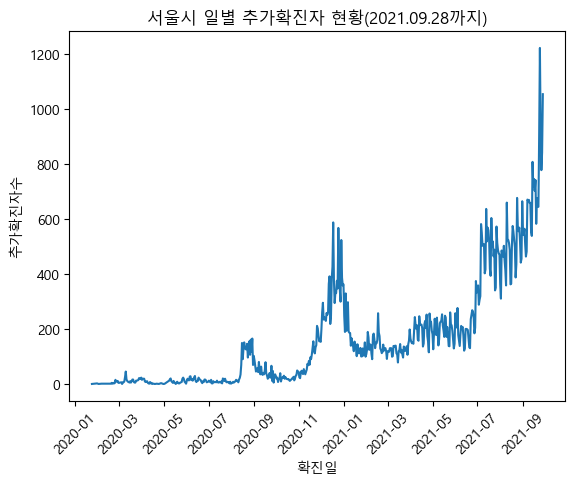

In [30]:
# 서울시 일별 추가 확진자 시각화

x = s_date.index
y = s_date.values

plt.plot(x, y)
plt.title('서울시 일별 추가확진자 현황(2021.09.28까지)')

plt.xlabel('확진일')
plt.ylabel('추가확진자수')

plt.xticks(rotation = 45)

plt.show()


In [32]:
# 서울시 구별 누적확진자 >> 많은 순으로 보기

data_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [33]:
data_gu.loc['All']

지역
강남구      6926
강동구      3782
강북구      2606
강서구      4447
관악구      5418
광진구      3486
구로구      4168
금천구      2064
기타       2321
노원구      3932
도봉구      2605
동대문구     3487
동작구      4120
마포구      3726
서대문구     2692
서초구      4284
성동구      2839
성북구      3779
송파구      6356
양천구      3291
영등포구     4463
용산구      2705
은평구      4284
종로구      1617
중구       1708
중랑구      3729
타시도      4715
All     99550
Name: All, dtype: int64

In [34]:
data_gu.loc['All'][:-1]

지역
강남구     6926
강동구     3782
강북구     2606
강서구     4447
관악구     5418
광진구     3486
구로구     4168
금천구     2064
기타      2321
노원구     3932
도봉구     2605
동대문구    3487
동작구     4120
마포구     3726
서대문구    2692
서초구     4284
성동구     2839
성북구     3779
송파구     6356
양천구     3291
영등포구    4463
용산구     2705
은평구     4284
종로구     1617
중구      1708
중랑구     3729
타시도     4715
Name: All, dtype: int64

In [37]:
s_gu = data_gu.loc['All'][:-1]

In [40]:
s_gu = s_gu.sort_values(ascending = True)

s_gu

지역
종로구     1617
중구      1708
금천구     2064
기타      2321
도봉구     2605
강북구     2606
서대문구    2692
용산구     2705
성동구     2839
양천구     3291
광진구     3486
동대문구    3487
마포구     3726
중랑구     3729
성북구     3779
강동구     3782
노원구     3932
동작구     4120
구로구     4168
서초구     4284
은평구     4284
강서구     4447
영등포구    4463
타시도     4715
관악구     5418
송파구     6356
강남구     6926
Name: All, dtype: int64

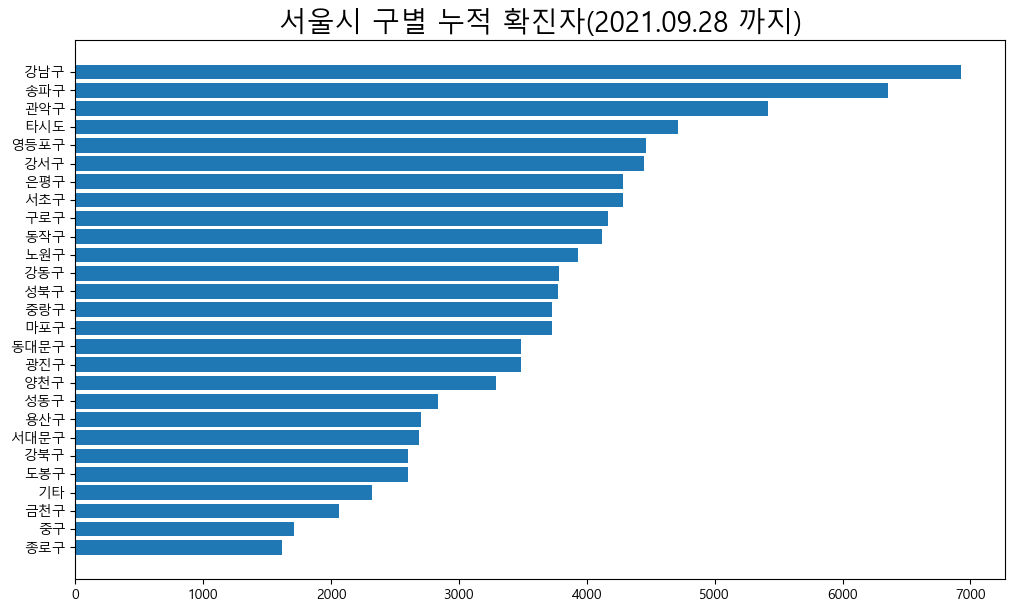

In [42]:
x = s_gu.index
y = s_gu.values

plt.figure(figsize = (12, 7))
plt.barh(x, y)
plt.title('서울시 구별 누적 확진자(2021.09.28 까지)',size = 20)

plt.show()

최근일 기준, 지역별 추가 확진자

In [43]:
data_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [45]:
# 가장 최근 날짜

data_gu.iloc[-2, :-1]

지역
강남구     45
강동구     51
강북구     25
강서구     41
관악구     48
광진구     36
구로구     55
금천구     31
기타      65
노원구     29
도봉구     35
동대문구    66
동작구     28
마포구     47
서대문구    30
서초구     19
성동구     24
성북구     41
송파구     68
양천구     27
영등포구    43
용산구     24
은평구     47
종로구     23
중구      37
중랑구     26
타시도     43
Name: 2021-09-28 00:00:00, dtype: int64

In [46]:
rs_gu = data_gu.iloc[-2, : -1]
rs_gu.head()

지역
강남구    45
강동구    51
강북구    25
강서구    41
관악구    48
Name: 2021-09-28 00:00:00, dtype: int64

In [47]:
rs_gu.sort_values(ascending = False)

지역
송파구     68
동대문구    66
기타      65
구로구     55
강동구     51
관악구     48
마포구     47
은평구     47
강남구     45
타시도     43
영등포구    43
성북구     41
강서구     41
중구      37
광진구     36
도봉구     35
금천구     31
서대문구    30
노원구     29
동작구     28
양천구     27
중랑구     26
강북구     25
성동구     24
용산구     24
종로구     23
서초구     19
Name: 2021-09-28 00:00:00, dtype: int64

In [48]:
rs_gu = rs_gu.sort_values(ascending = False)

In [50]:
rs_gu = rs_gu.sort_values(ascending = True)



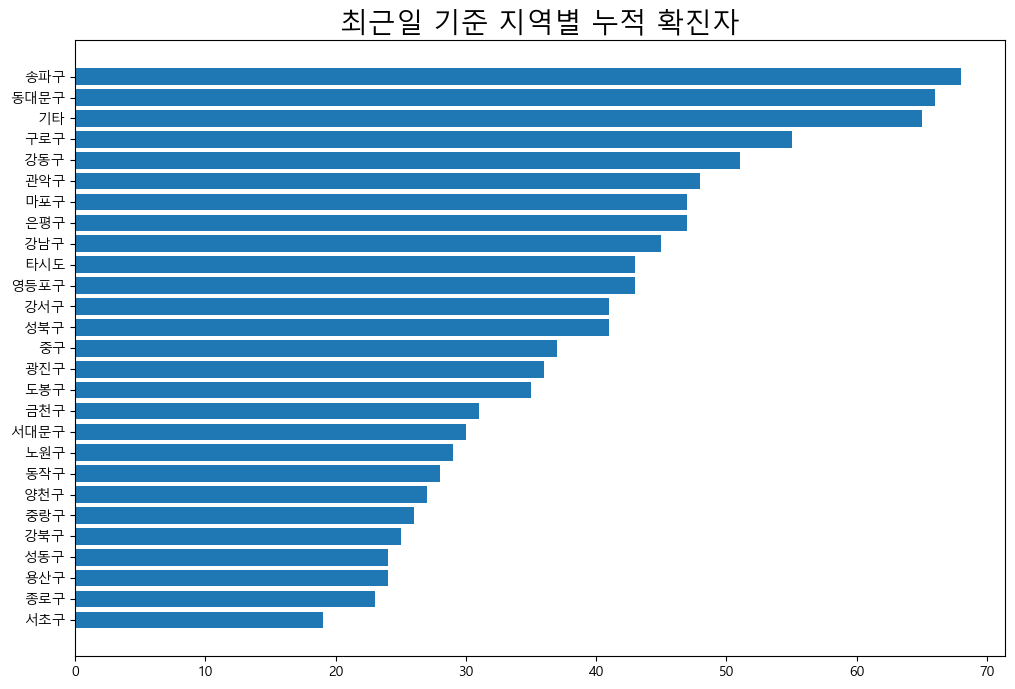

In [51]:
# 시각화 

x = rs_gu.index
y = rs_gu.values

plt.figure(figsize = (12, 8))
plt.title('최근일 기준 지역별 누적 확진자', size = 20)
plt.barh(x, y)
plt.show()

접촉력에 따른 확진건수 >> BEST 10

In [52]:
data['접촉력']

0         감염경로 조사중
1         감염경로 조사중
2         감염경로 조사중
3         감염경로 조사중
4         감염경로 조사중
           ...    
99545    기타 확진자 접촉
99546         해외유입
99547     종로구 집단발병
99548         해외유입
99549         해외유입
Name: 접촉력, Length: 99550, dtype: object

In [53]:
data['접촉력'].value_counts()

기타 확진자 접촉        37943
감염경로 조사중         31964
타시도 확진자 접촉        4244
해외유입              1729
동부구치소 관련          1175
                 ...  
구로구소재 고등학교 관련        1
광진구 소재 병원 관련         1
해외 유입                1
부산시 방문주사 관련          1
안양 목회자 관련            1
Name: 접촉력, Length: 1096, dtype: int64

In [54]:
data['접촉력'].value_counts()[:10]

기타 확진자 접촉               37943
감염경로 조사중                31964
타시도 확진자 접촉               4244
해외유입                     1729
동부구치소 관련                 1175
병원 및 요양시설                 988
송파구 소재 시장 관련(?21.9.)      659
성북구 사랑제일교회 관련             641
중구 소재 시장 관련(?21.9.)       277
강서구 교회 관련                 246
Name: 접촉력, dtype: int64

최근 월 접촉력에 따른 확진건수 >> BEST10 (2021-09 기준)

In [56]:
condition = (data['확진일'].dt.year == 2021) & (data['확진일'].dt.month == 9)

# 2021년 9월 데이터만 추출
data[condition]

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
19529,80021,2021-09-01,동작구,NaN,감염경로 조사중,퇴원
19530,80020,2021-09-01,중랑구,NaN,감염경로 조사중,퇴원
19531,80019,2021-09-01,동작구,NaN,기타 확진자 접촉,-
19532,80018,2021-09-01,중랑구,NaN,감염경로 조사중,퇴원


In [58]:
data[condition]['접촉력'].value_counts()

감염경로 조사중                  8117
기타 확진자 접촉                 8088
송파구 소재 시장 관련(?21.9.)       658
타시도 확진자 접촉                 587
중구 소재 시장 관련(?21.9.)        277
                          ... 
서초구 소재 종교시설 관련(?21.8.)       1
해외 유입                        1
경기 고양시 교회/장례식장 관련            1
광진구 소재 어린이집 관련(?21.8.)       1
부평구 외국인지인모임 관련               1
Name: 접촉력, Length: 123, dtype: int64

In [59]:
data[condition]['접촉력'].value_counts()[:10]

감염경로 조사중                8117
기타 확진자 접촉               8088
송파구 소재 시장 관련(?21.9.)     658
타시도 확진자 접촉               587
중구 소재 시장 관련(?21.9.)      277
병원 및 요양시설                186
해외유입                     122
용산구 소재 병원 관련(?21.9.)      77
동대문구 소재 시장 관련             44
강서구 소재 시장 관련              44
Name: 접촉력, dtype: int64